In [ ]:
#pip install yfinance

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=94722401ac83a89519ee1e5002873ce79ca8a0128c0c8abc67f689cbfefdbee1
  Stored in directory: /Users/mdshahid/Library/Caches/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-macosx_10_13_universal2.whl size=439166 sha256=a703040aa9ace118c7c64c748a09d4dcbb837c08d25e2024406432918071251a
  Stored in directory: /Users/mdshahid/Library/Caches/pip/wheels/e2/48/b6/675a31c56e50b8b343e1f

In [2]:
import yfinance as yf

In [80]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [81]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

/var/folders/_j/7r7v0gcd3956bd5xhcrljk1m0000gn/T/ipykernel_7395/2891900888.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [82]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-12-08,10.158397,10.158397,9.960251,10.026052,357735875
2005-12-09,10.122528,10.285299,10.106695,10.266004,306881974
2005-12-12,10.206881,10.271199,10.141080,10.256851,279046027
2005-12-13,10.327601,10.340217,10.182887,10.204161,327775997
2005-12-14,10.363964,10.383013,10.278126,10.316469,266210095


In [83]:
google_data.shape

(5030, 5)

In [84]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,57.592270,58.191217,56.970014,57.562701,8.986625e+07
std,56.577685,57.208388,55.922725,56.532469,1.129209e+08
min,6.368385,6.663503,6.117549,6.493804,1.584340e+05
25%,14.351564,14.480384,14.214396,14.348473,2.528150e+07
50%,34.679182,35.052377,34.365082,34.693583,4.217300e+07
75%,86.742523,87.875773,86.053618,86.769962,1.110547e+08
max,323.640015,328.670013,319.980011,326.799988,1.650833e+09


In [85]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2005-12-08 to 2025-12-05
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5030 non-null   float64
 1   (High, GOOG)    5030 non-null   float64
 2   (Low, GOOG)     5030 non-null   float64
 3   (Open, GOOG)    5030 non-null   float64
 4   (Volume, GOOG)  5030 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [86]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

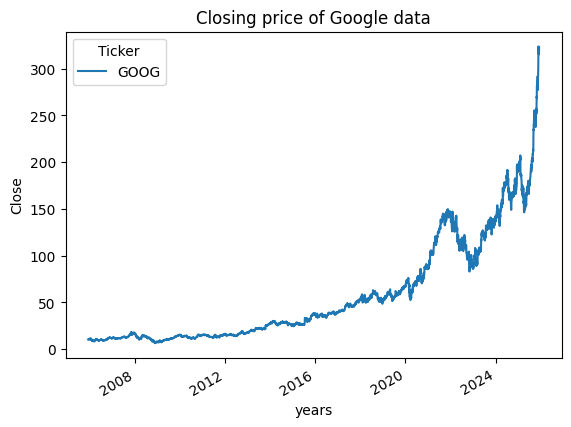

In [90]:
plt.figure(figsize = (15,5))
google_data["Close"].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [91]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [92]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

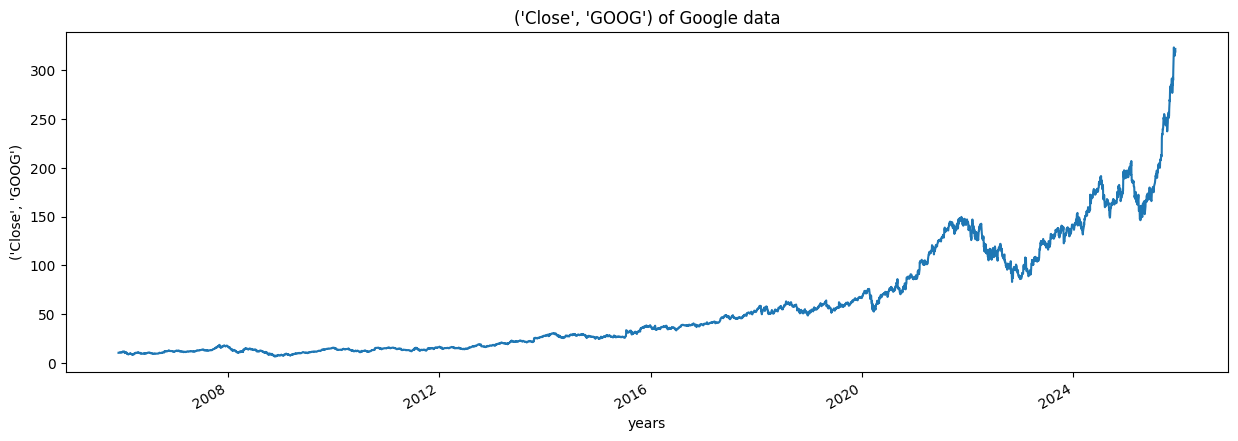

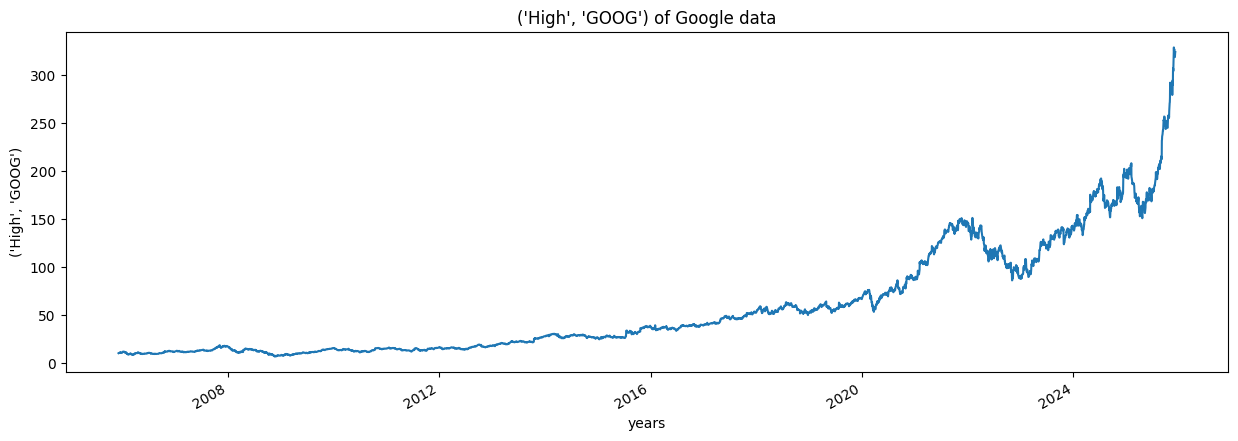

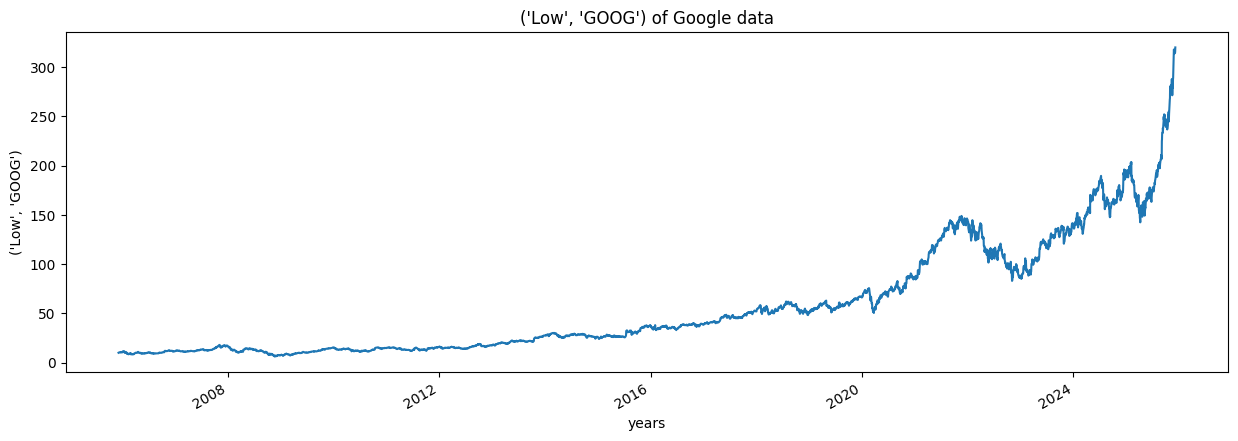

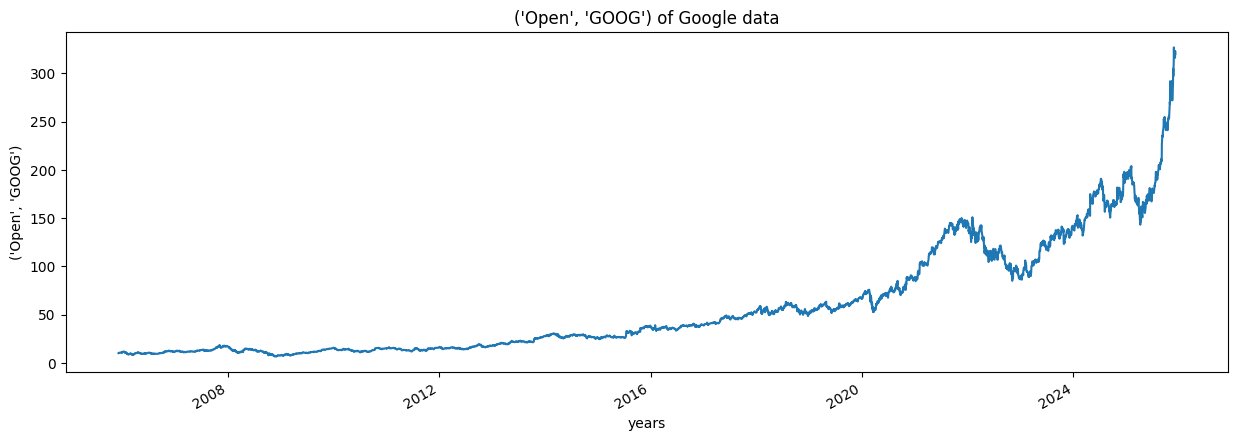

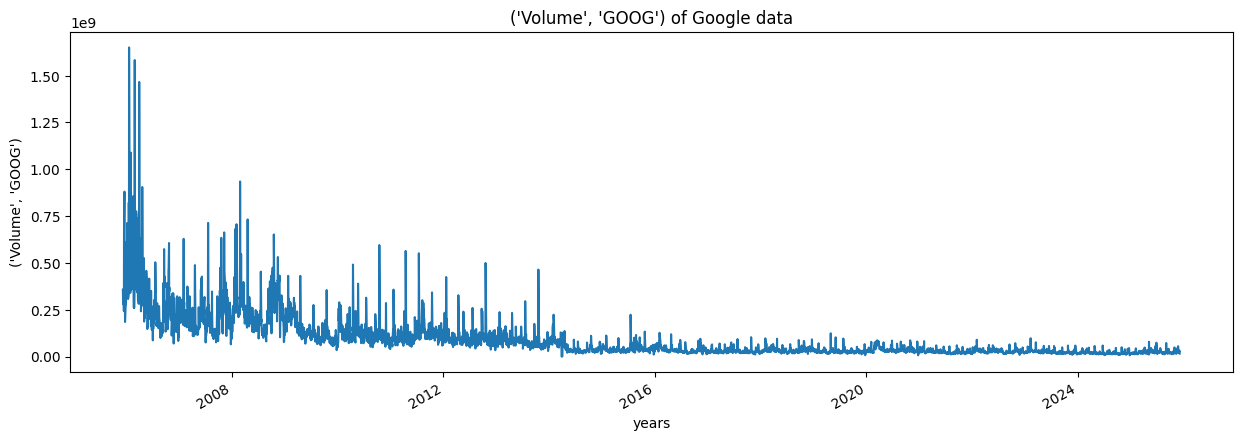

In [93]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [94]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [95]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [96]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [97]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [98]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 16
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [99]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()


In [100]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-11-29          NaN
2006-11-30          NaN
2006-12-01          NaN
2006-12-04          NaN
2006-12-05    10.087085
Name: MA_for_250_days, dtype: float64

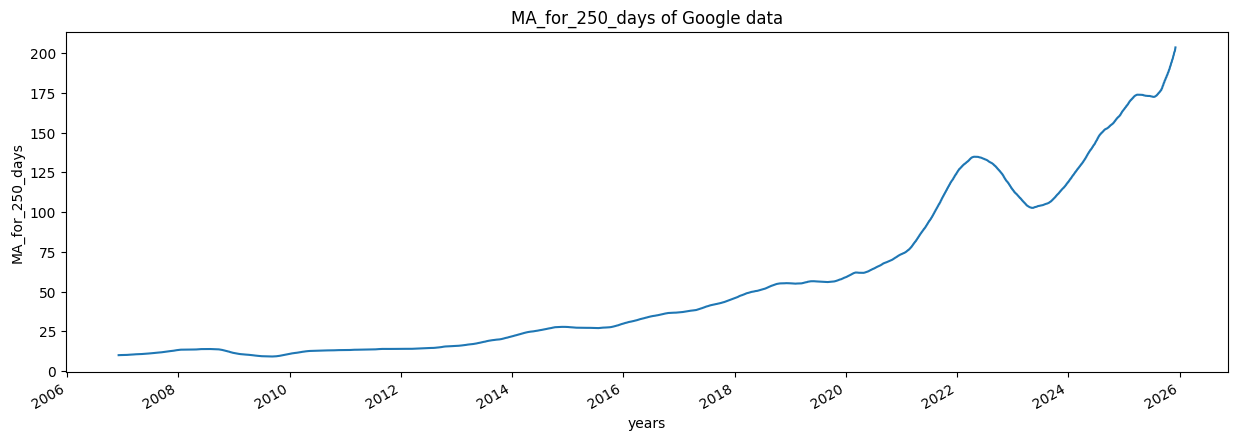

In [106]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

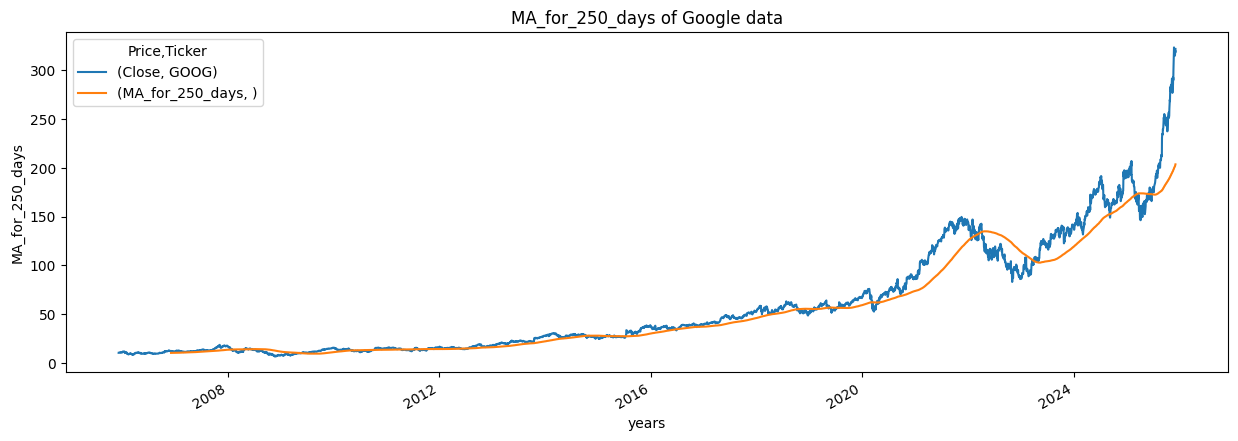

In [102]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

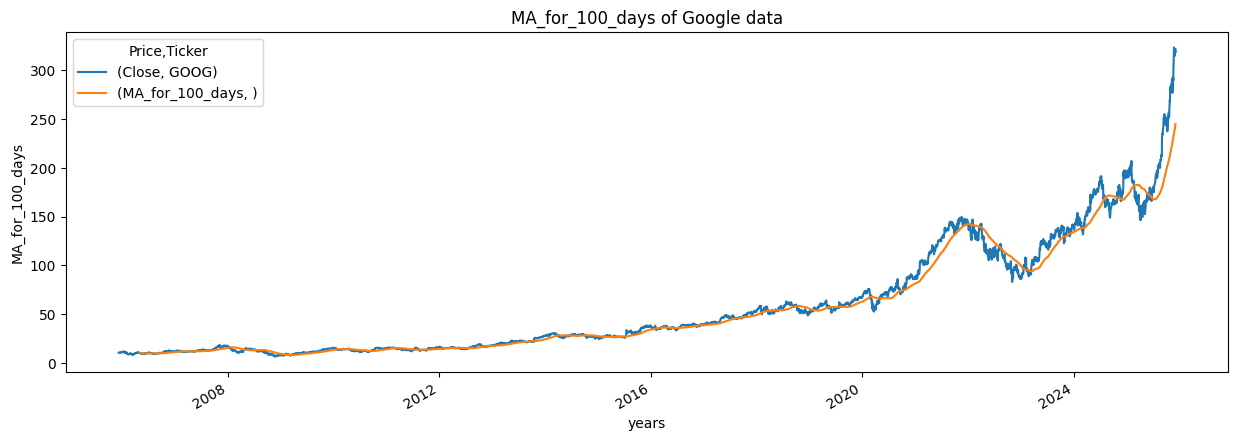

In [103]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

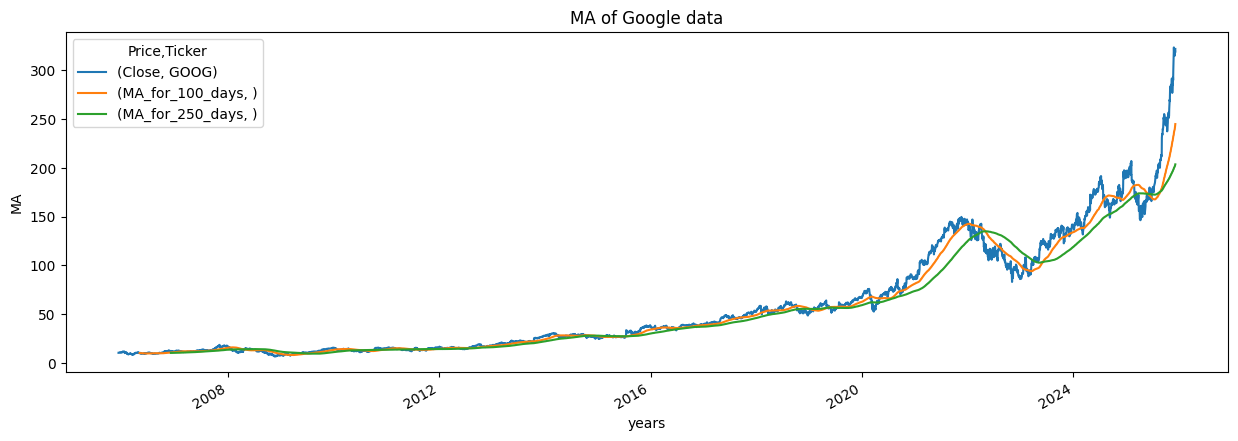

In [105]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [108]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-12-08,10.158397,NaN
2005-12-09,10.122528,-0.003531
2005-12-12,10.206881,0.008333
2005-12-13,10.327601,0.011827
2005-12-14,10.363964,0.003521


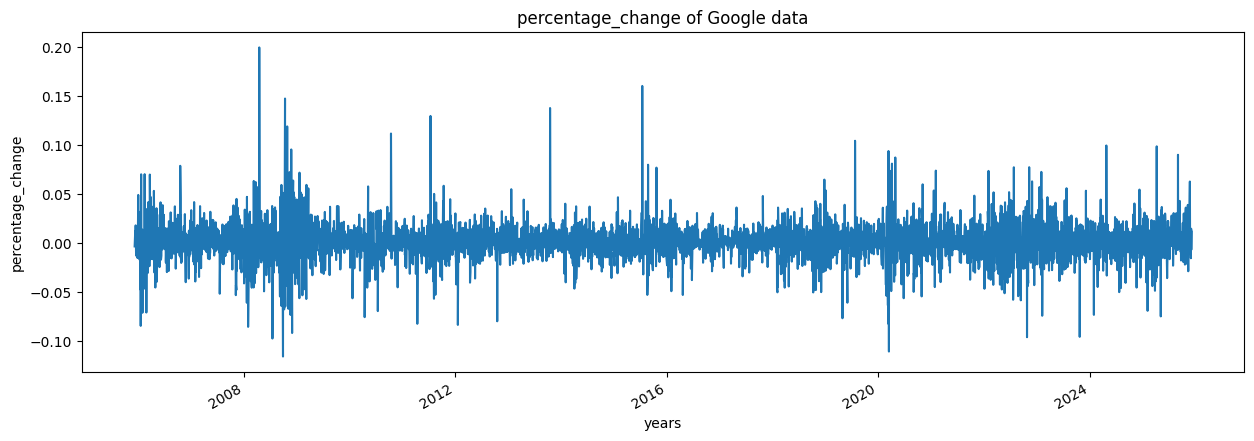

In [109]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [116]:
close_price = google_data[['Close']]

In [117]:
max(close_price.values),min(close_price.values) 

(array([323.64001465]), array([6.36838531]))

In [130]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 3.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.01194564],
       [0.01183258],
       [0.01209845],
       ...,
       [0.99048128],
       [0.98345266],
       [0.99511454]], shape=(5030, 1))

In [132]:
len(scaled_data)

5030

In [133]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [134]:
x_data[0],y_data[0]

(array([[0.01194564],
        [0.01183258],
        [0.01209845],
        [0.01247895],
        [0.01259356],
        [0.01287346],
        [0.01346603],
        [0.0130333 ],
        [0.01343406],
        [0.01316819],
        [0.01361339],
        [0.01352685],
        [0.01303642],
        [0.01319626],
        [0.01268634],
        [0.01227389],
        [0.01386212],
        [0.01464258],
        [0.0151104 ],
        [0.01623472],
        [0.01633139],
        [0.01655438],
        [0.01670019],
        [0.01607644],
        [0.01628071],
        [0.01634777],
        [0.01461686],
        [0.01395724],
        [0.01107316],
        [0.01325941],
        [0.01447027],
        [0.01368825],
        [0.01378726],
        [0.01372644],
        [0.0132064 ],
        [0.01366173],
        [0.01125405],
        [0.01080651],
        [0.00967674],
        [0.00995353],
        [0.00861402],
        [0.00870446],
        [0.0079006 ],
        [0.0082    ],
        [0.00688155],
        [0

In [135]:

int(len(x_data)*0.7)

3451

In [136]:
4908-100-int(len(x_data)*0.7)

1357

In [137]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [138]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1479, 100, 1)
(1479, 1)


In [140]:
pip install tensorflow

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 MB 3.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 10.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.7 MB/s eta 0:00:00a 0:00:01
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated 

In [141]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [142]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [144]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 110s 31ms/step - loss: 6.7313e-05
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 111s 32ms/step - loss: 2.5242e-05


In [145]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [146]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [147]:
predictions

array([[0.21405178],
       [0.21653   ],
       [0.2178548 ],
       ...,
       [1.0076903 ],
       [1.012605  ],
       [1.0146375 ]], shape=(1479, 1), dtype=float32)

In [148]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 74.280945],
       [ 75.06721 ],
       [ 75.48753 ],
       ...,
       [326.07993 ],
       [327.63922 ],
       [328.28406 ]], shape=(1479, 1), dtype=float32)

In [149]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 73.71555328],
       [ 73.79251862],
       [ 73.82727814],
       ...,
       [320.61999512],
       [318.39001465],
       [322.08999634]], shape=(1479, 1))

In [150]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [151]:
rmse

np.float64(8.364350399224183)

In [152]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-01-21,73.715553,74.280945
2020-01-22,73.792519,75.067207
2020-01-23,73.827278,75.487534
2020-01-24,72.837051,75.640404
2020-01-27,71.207703,75.162933


<Figure size 640x480 with 0 Axes>

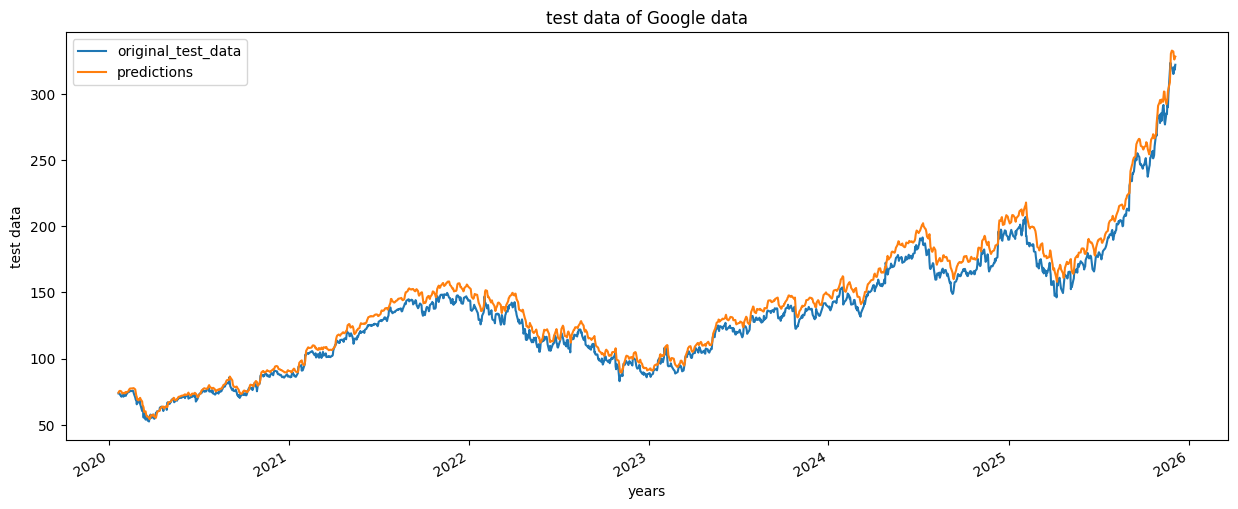

In [153]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

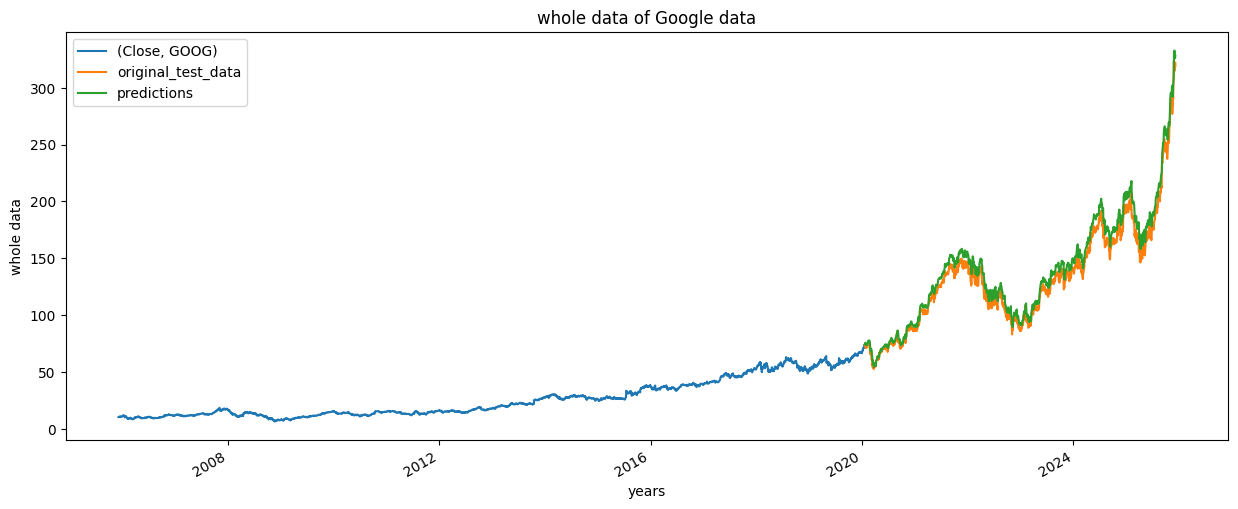

In [154]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [155]:
model.save("Latest_stock_price_model.keras")